In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../data/train_df.csv")
data = data.dropna(subset=['words'])
data = data.sample(10000)

In [3]:
data

,target,id,date,flag,user,text,words
567559,0,2253500579,Sat Jun 20 08:16:28 PDT 2009,NO_QUERY,mgliddy,thanks will when get home haha im stuck at the...,thanks get home haha im stuck dmv mom
701803,0,1679831716,Sat May 02 10:16:53 PDT 2009,NO_QUERY,SUGARvampchick,uh oh sound like me,uh oh sound like
165793,0,1988842982,Sun May 31 23:32:11 PDT 2009,NO_QUERY,joniko,need wordpress coder asap some ploblems with ...,need wordpress coder asap ploblems plugins j k...
227223,1,1990812119,Mon Jun 01 05:47:58 PDT 2009,NO_QUERY,thuyHOANG,listening to cant go wrong when ur in the car ...,listen cant go wrong ur car great song great a...
516427,1,1558823043,Sun Apr 19 09:30:04 PDT 2009,NO_QUERY,SaschaScarpulla,is realizing dont one drop of caffeine this lo...,realize dont one drop caffeine lovely morning ...
...,...,...,...,...,...,...,...
266972,0,2174420214,Sun Jun 14 22:30:56 PDT 2009,NO_QUERY,Sarttimi,haha never answer me esmee makes me sad lol cu...,haha never answer esmee make sad lol cuz one u...
321997,0,2246899974,Fri Jun 19 18:17:28 PDT 2009,NO_QUERY,babysharon7628,sad bc the person who asked me to twitter hurt...,sad bc person ask twitter hurt feel really bad
759048,1,2002086320,Tue Jun 02 03:05:45 PDT 2009,NO_QUERY,whitsundays,am ready for bed early tonighthave good saili...,ready bed early tonighthave good sail story re...
152693,0,1826300472,Sun May 17 08:10:46 PDT 2009,NO_QUERY,QueenBananaBean,have to be at work in hours really hate worki...,work hour really hate work til pm want back


In [4]:
data['target'].value_counts()

target
1    5035
0    4965
Name: count, dtype: int64

In [5]:
df_neg = data[data['target'] == 0]
df_pos = data[data['target'] == 1]

In [6]:
def compter_mots(phrase):
    mots = phrase.split()
    return len(mots)

df_neg['nombre_de_mots'] = df_neg['text'].apply(lambda x: compter_mots(x))

/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_42706/1624786463.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['nombre_de_mots'] = df_neg['text'].apply(lambda x: compter_mots(x))


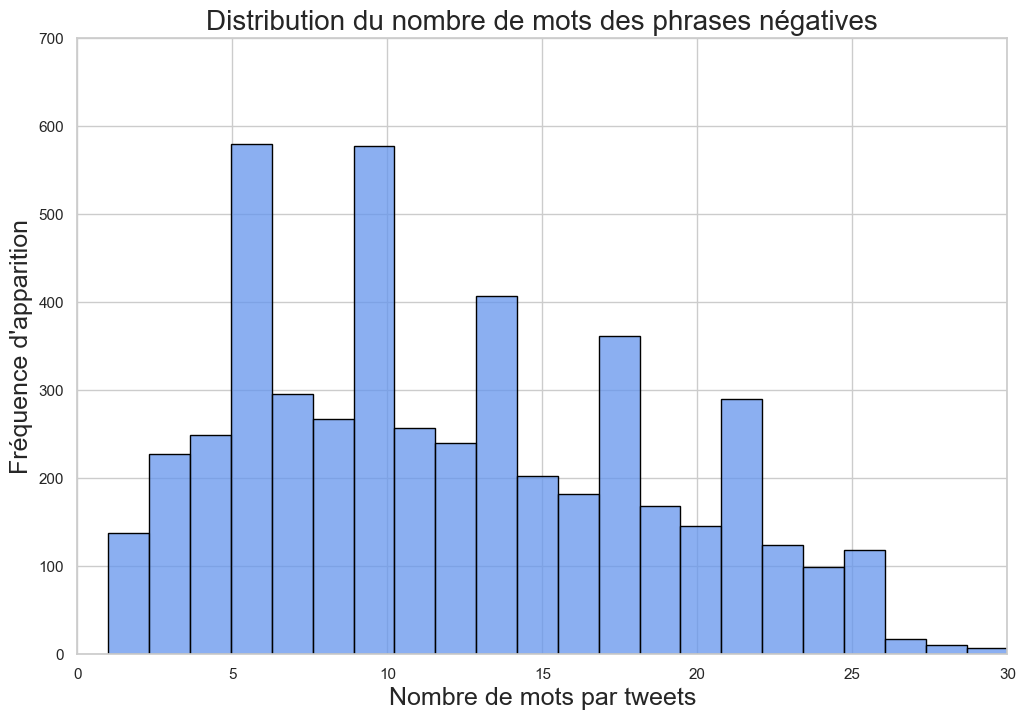

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialiser le style seaborn
sns.set(style="whitegrid")

# Définir la taille de la figure
plt.figure(figsize=(12, 8))

# Créer l'histogramme avec seaborn
sns.histplot(df_neg['nombre_de_mots'], bins=22, kde=False, color='cornflowerblue', edgecolor='black')

# Ajouter le titre et les labels
plt.title('Distribution du nombre de mots des phrases négatives', fontsize=20)
plt.xlabel('Nombre de mots par tweets', fontsize=18)
plt.ylabel("Fréquence d'apparition", fontsize=18)

plt.xlim(0, 30)
plt.ylim(0, 700)

# Afficher le graphique
plt.show()


/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_42706/2947049726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['nombre_de_mots'] = df_pos['text'].apply(lambda x: compter_mots(x))


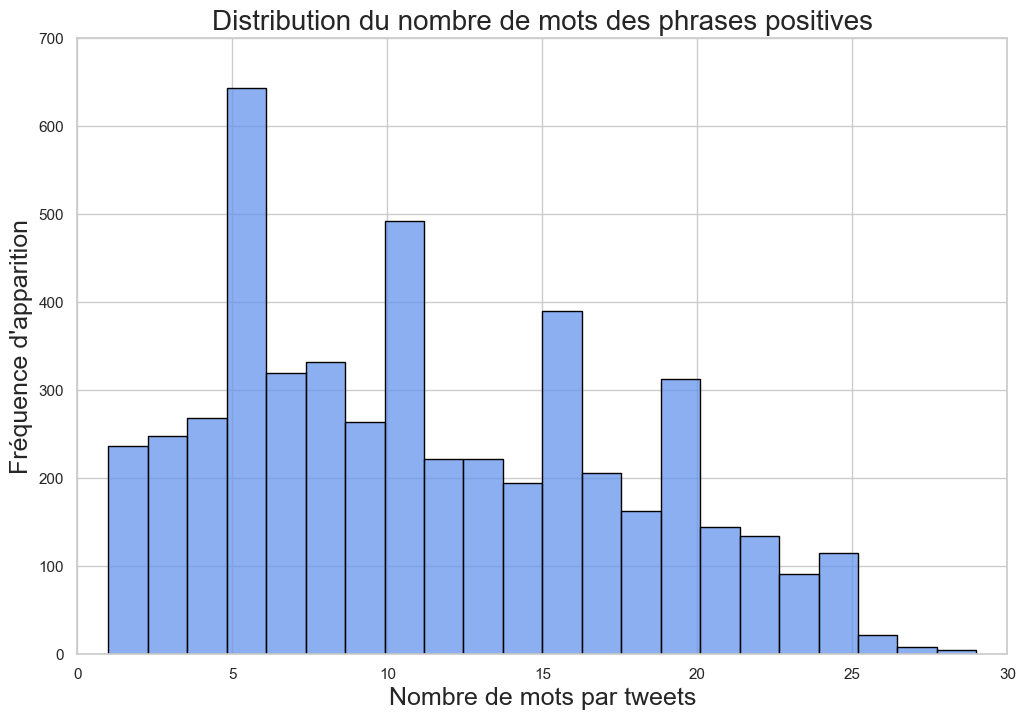

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pos['nombre_de_mots'] = df_pos['text'].apply(lambda x: compter_mots(x))
# Initialiser le style seaborn
sns.set(style="whitegrid")

# Définir la taille de la figure
plt.figure(figsize=(12, 8))

# Créer l'histogramme avec seaborn
sns.histplot(df_pos['nombre_de_mots'], bins=22, kde=False, color='cornflowerblue', edgecolor='black')

# Ajouter le titre et les labels
plt.title('Distribution du nombre de mots des phrases positives', fontsize=20)
plt.xlabel('Nombre de mots par tweets', fontsize=18)
plt.ylabel("Fréquence d'apparition", fontsize=18)

plt.xlim(0, 30)
plt.ylim(0, 700)

# Afficher le graphique
plt.show()


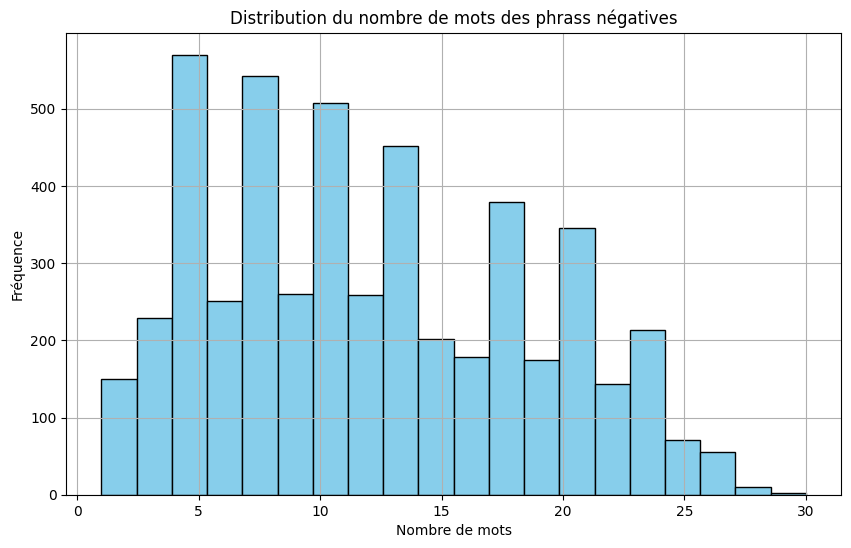

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_neg['nombre_de_mots'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution du nombre de mots des phrass négatives')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_19437/2493140727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['nombre_de_mots'] = df_pos['text'].apply(lambda x: compter_mots(x))


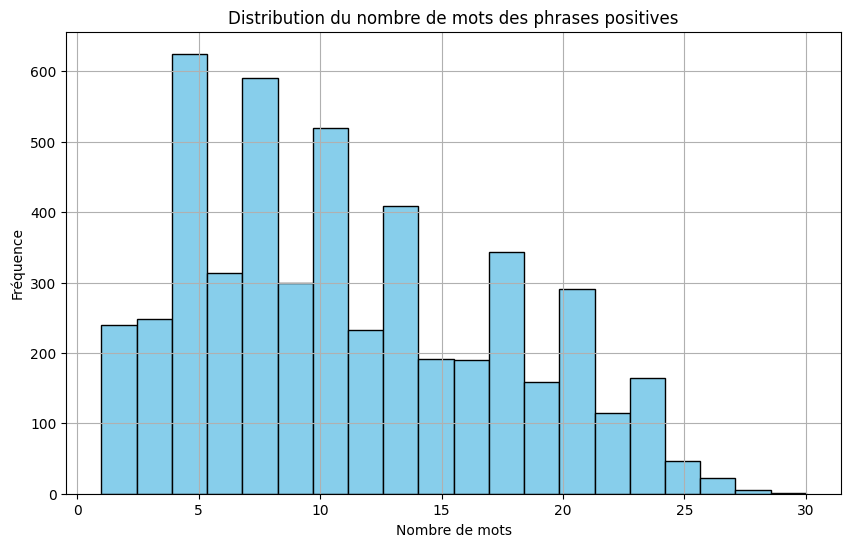

In [37]:
df_pos['nombre_de_mots'] = df_pos['text'].apply(lambda x: compter_mots(x))
plt.figure(figsize=(10, 6))
plt.hist(df_pos['nombre_de_mots'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution du nombre de mots des phrases positives')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

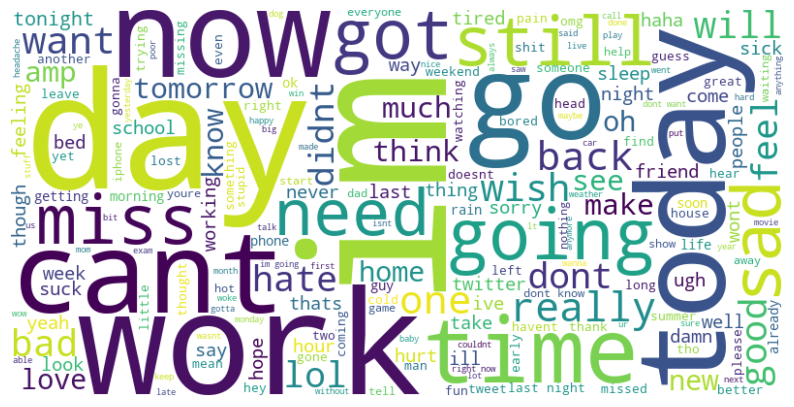

In [40]:
from wordcloud import WordCloud

texte_combine = ' '.join(df_neg['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte_combine)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

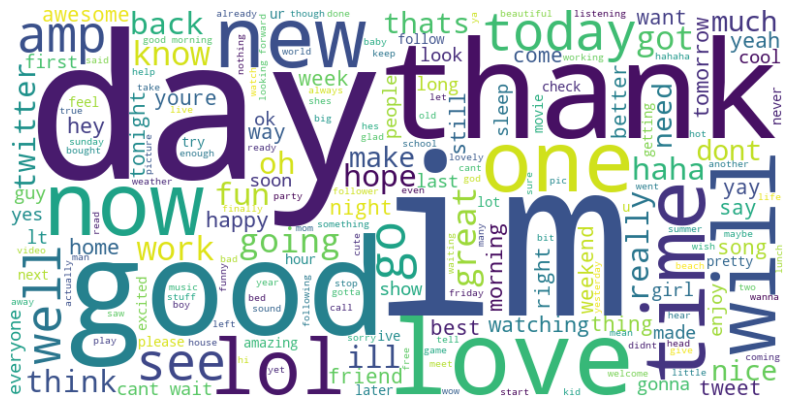

In [42]:
texte_combine = ' '.join(df_pos['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte_combine)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
print(data['date'].min())
print(data['date'].max())

Fri Apr 17 20:32:29 PDT 2009
Wed May 27 07:25:35 PDT 2009


In [43]:
sample_df = '../Data/dataset.csv'
data.to_csv(sample_df, index=False)